<h1>PROHACK by Mckensy</h1>

<h2>Probelm Description</h2> :

 “Beeep…Beeeep….Beeeep… Hooomans*, are you there?...”

This very strange transmission is coming from your narrowband radio signal receiver, pointed towards one of the farthest away galaxies. It’s early morning, you are sitting in your radio observatory high in the mountains.

For the last 10 years you’ve been a Chief Data Scientist in one of the best astrophysics research teams in the world. You are enjoying a quiet time with a cup of coffee and reviewing the data reports from last night, when this strange sound arrived. You almost spill your coffee in surprise. “Am I dreaming?” is your first thought as you move closer towards the speaker and listen…
“Beep…Beeeep….Beeeep… To all Hooomans who can hear us – we need your help”
You lean closer and grab a notebook and a pencil – you don’t really trust computers when it comes to such important tasks as taking notes from a radio transmission. You start recording everything that the strange voice from light years away is saying.
“… We need serious Data Science help and we know you Hooomans are the best at it…. We are an intergalactic species which have almost achieved singularity and the highest possible levels of development. We travel fast through space and explore other galaxies”
“The only essence that we consume is energy, measured in DSML units…Our populace is widespread and we live across many different star clusters and galaxies. What we need now is to optimize our well-being across all those galaxies… We have a lot of data but our сomputers and methods are too weak – we urgently need your data science knowledge to help us”
“Only two steps prevent us from achieving singularity

· To understand what makes us better off.

Our elders used the composite index to measure our well-being performance, but this knowledge has disappeared in the sands of time.

Use our data and train your model to predict this index with the highest possible level of certainty.

· To achieve the highest possible level of well-being through optimized allocation of additional energy

We have discovered the star of an unusually high energy of 50000 zillion DSML.

We have agreed between ourselves that 

· no one galaxy will consume more than 100 zillion DSML and 
  at least 10% of the total energy will be consumed by galaxies in need with existence expectancy index below 0,7.
Think of our galaxies as your “countries” (or how you call them??) and our population as citizens. We have similar healthcare and wellbeing characteristic as you, Hooomans”
“We are sending all the data to you right now. Let the data be with you, Hoomans… … …”
Transmission suddenly ends. You put your notebook and pencil away and start thinking. You really want to help this species optimize their well-being. You open up Python and upload the dataset from the narrowband radio signal receiver. It will be another great day at the observatory today.
————
* probably intergalactic species meant to say “humans” here but we will never know for sure</h2>
<h2>Description Data Recieved :</h2>

The solutions are evaluated on two criteria: predicted future Index values and allocated energy from a newly discovered star

1) Index predictions are evaluated using RMSE metric

2) Energy allocation is also evaluated using RMSE metric and has a set of known factors that need to be taken into account.

Every galaxy has a certain limited potential for improvement in the index described by the following function:

Potential for increase in the Index = -np.log(Index+0.01)+3

Likely index increase dependent on potential for improvement and on extra energy availability is described by the following function:

Likely increase in the Index = extra energy * Potential for increase in the Index **2 / 1000

There are also several constraints:

in total there are 50000 zillion DSML available for allocation and no galaxy at a point in time should be allocated more than 100 zillion DSML or less than 0 zillion DSML. Galaxies with low existence expectancy index below 0.7 should be allocated at least 10% of the total energy available in the foreseeable future

3) Leaderboard is based on a combined scaled metric:

80% prediction task RMSE + 20% optimization task RMSE * lambda where lambda is a normalizing factor

4) Leaderboard is 80% public and 20% private

<h3>Install last verison of Ctaboost and Vecstack</h3>

In [ ]:
!pip install catboost
!pip install vecstack 
!pip install category_encoders 

     |████████████████████████████████| 64.8MB 60kB/s 
  Created wheel for vecstack: filename=vecstack-0.4.0-cp36-none-any.whl size=19877 sha256=1a8be083835d58ef36ee33db56a03476bc86c35f939df435e490a265e842c95d
  Stored in directory: /root/.cache/pip/wheels/5f/bb/4e/f6488433d53bc0684673d6845e5bf11a25240577c8151c140e
Successfully built vecstack
     |████████████████████████████████| 81kB 3.2MB/s 


<h3>import necessary libraries</h3>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
from sklearn.feature_selection import RFE
from sklearn.decomposition import pca
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import (GradientBoostingRegressor,
                              ExtraTreesRegressor,
                              BaggingRegressor,
                          RandomForestRegressor,
                              RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier)

from sklearn.linear_model import (LinearRegression,Lasso,Ridge,LogisticRegression,LogisticRegressionCV)
from sklearn.metrics import (mean_absolute_error,explained_variance_score,f1_score,confusion_matrix,accuracy_score)
from sklearn.neighbors import KNeighborsRegressor ,KNeighborsClassifier
from sklearn.svm import SVR ,SVC
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import xgboost as xgb
from  xgboost import (
                   XGBRegressor, 
                   XGBClassifier
                                )
from catboost import (CatBoostClassifier,CatBoostRegressor)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
from sklearn.model_selection import train_test_split
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     GridSearchCV,GroupKFold )
from vecstack import stacking
from vecstack import StackingTransformer
import requests
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.neighbors import NearestNeighbors
from io import StringIO 
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.svm import SVR, NuSVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, StackingRegressor,HistGradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import( LGBMRegressor,LGBMClassifier)
from vecstack import stacking
from vecstack import StackingTransformer
from catboost import CatBoostRegressor
import warnings
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')


In [ ]:
# set random seed of numpy 
np.random.seed(3106873493)

In [ ]:
# use previous submission 
sub=pd.read_csv('/content/SubmissionFirstPlace.csv')


<h2>  EDA (Exploratry Data Analysis ) </h2>

In [ ]:
#import Train and Test Data
df=pd.read_csv('/content/train.csv')
df_test=pd.read_csv('/content/test.csv')

In [ ]:
df.shape

(3865, 80)

In [ ]:
# Statistic describe
df.describe()

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
count,3.865000e+03,3864.000000,3864.000000,3837.000000,3837.000000,3732.000000,3502.000000,3474.000000,3474.000000,3432.000000,2021.000000,2015.000000,1502.000000,1271.000000,1271.000000,1271.000000,1259.000000,1264.000000,12

we have negative values, which seem to be noise or typing errors at BD level, we also have procentage greater than 100 at the level of some columns (Employment in services (% of total employment ...). the variance appears they are victims of outliers values

In [ ]:
# check percent of missing value
flights_missing = df.isna()
flights_num_missing = flights_missing.sum()
pd.DataFrame(flights_num_missing / len(df))

,0
galactic year,0.000000
galaxy,0.000000
existence expectancy index,0.000259
existence expectancy at birth,0.000259
Gross income per capita,0.007245
...,...
Adjusted net savings,0.764036
"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",0.756533
Private galaxy capital flows (% of GGP),0.773868
Gender Inequality Index (GII),0.781630


We have a lot of missing values, and we have to treat them with caution

In [ ]:
# lets check the correlation 
corr = df.corr()
corr.style.background_gradient()

We have an intercorrelation between variables and this is due to the large number of missing values . the best way to deal with this problem is to remove few columns

In [ ]:
# check a number of Categorical  varibale 
df.select_dtypes(include=['object'])

,galaxy
0,Large Magellanic Cloud (LMC)
1,Camelopardalis B
2,Virgo I
3,UGC 8651 (DDO 181)
4,Tucana Dwarf
...,...
3860,Columba I
3861,"Leo II Dwarf (Leo B, DDO 93)"
3862,Canes Venatici I Dwarf
3863,KKs 3


In [ ]:
len(df['galaxy'].unique())

181

In [ ]:
df['galaxy'].value_counts()

Andromeda XXII[57]                             26
Andromeda XXIV                                 26
Andromeda XII                                  26
Tucana Dwarf                                   26
Andromeda XIX[60]                              26
                                               ..
Andromeda X                                    17
Sagittarius Dwarf Irregular Galaxy (SagDIG)    17
Andromeda XXI[57]                              17
Pegasus Dwarf Irregular (DDO 216)              17
NGC 5253                                        1
Name: galaxy, Length: 181, dtype: int64

In [ ]:
set(df['galaxy'])-set(df_test['galaxy'])

{'Andromeda XII',
 'Andromeda XIX[60]',
 'Andromeda XVIII[60]',
 'Andromeda XXII[57]',
 'Andromeda XXIV',
 'Hercules Dwarf',
 'NGC 5253',
 'Triangulum Galaxy (M33)',
 'Tucana Dwarf'}

we have only one Categorical variable  (Galaxy), with 181 unique values. we also have galaxies that are in the data train and aren't in the data test. the galaxy 'NGC 5253' exists in the train data  with a single instance and doesn't exist in the data test, so we should drop it 

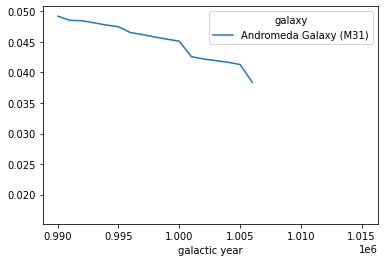

In [ ]:
# check the relation between Galactic year , galaxy and Y  
test_concat=df_test[['galactic year','galaxy']]
test_concat['y']=np.nan
data_concat=pd.concat([df[['galactic year','galaxy','y']],test_concat],axis=0)
pivot_data=pd.pivot_table(data_concat,columns='galactic year',index='galaxy',values='y')
pivot_data.loc[pivot_data.index=='Andromeda Galaxy (M31)'].T.plot()

Text(0, 0.5, 'Index')

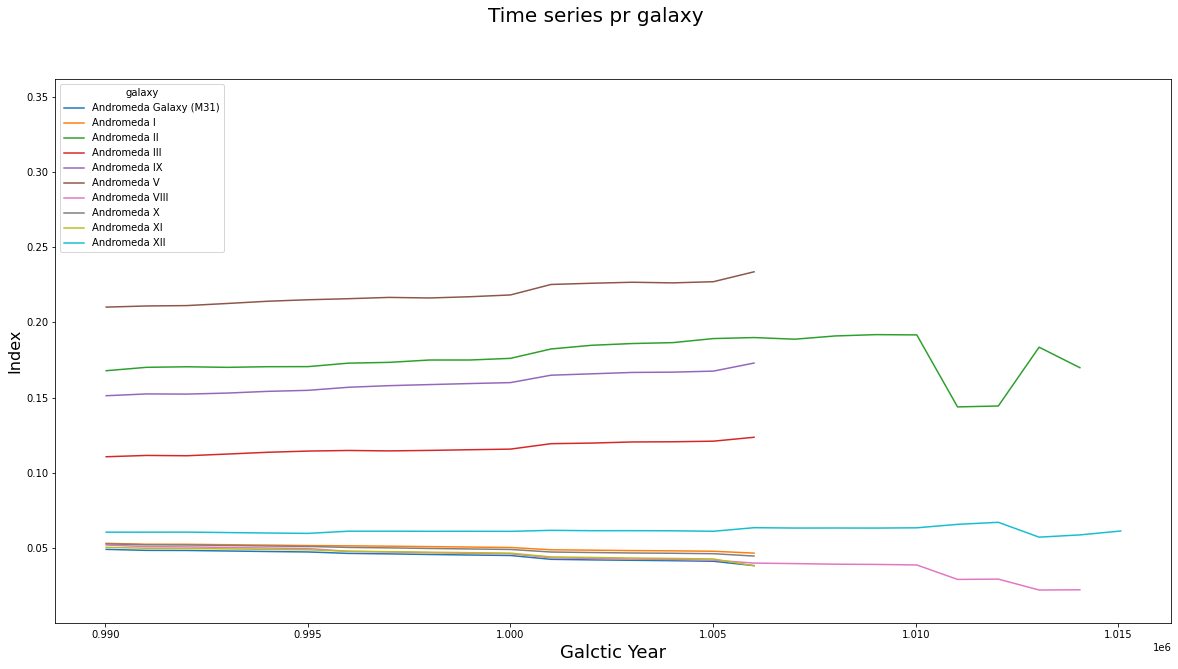

In [ ]:
pivot_data.T.iloc[:,0:10].plot(figsize=(20,10),fontsize=10)
plt.suptitle('Time series pr galaxy', fontsize=20)
plt.xlabel('Galctic Year', fontsize=18)
plt.ylabel('Index', fontsize=16)

Now we can see the pattern, if we take a galaxy with galactic year and the target varibale, after that we sort the Y by galactic year for this galaxy we find a time series either increasing or decorating. so we can find the max value and the min value of each prediciton in the test data. and that could help our model to predict the test data in the best possible way.

In [ ]:
df.columns 'existence expectancy at birth',

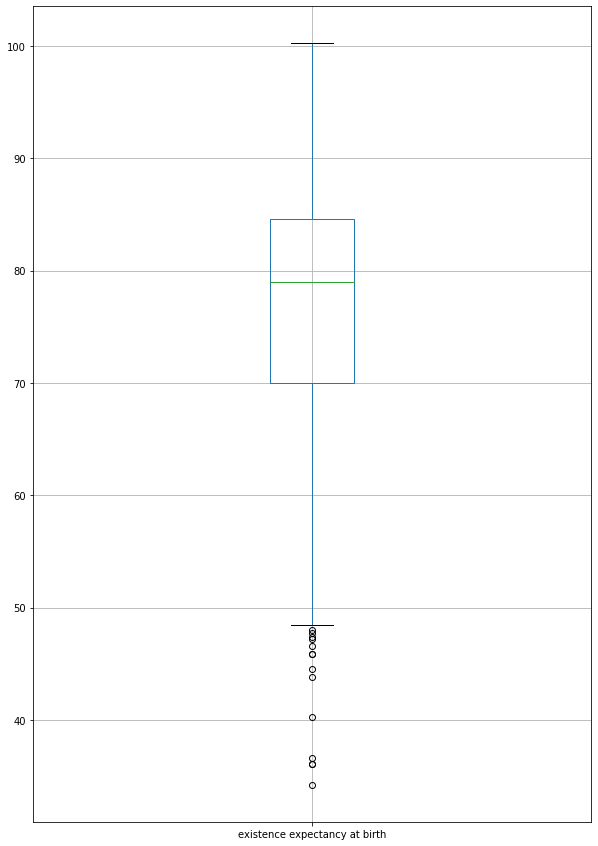

In [ ]:
# check outliers (let's take existence expectancy at birth  as exemple)
df.dropna(axis=1,thresh=0.4*df.shape[0]).drop(['galactic year','y','galaxy'],axis=1)[['existence expectancy at birth']].boxplot(figsize=(10,15))

as we have a lot of noise values ​​we can't process it all manually, so the best method is to use Local Outlier Factor from sklearn.neighbors

<h2>Data Preproccessing </H2>

### KNN Features
As we saw in our EDA, each galaxy constructs a time-series. And each time series has a trend, as the galactic year increases the target "y" decreases.<br>
At this point we wanted to introduce new features allowing our model to take advantage of this trend. Our intuition was to add features like min and max of close neighbors, this will allow the model to tide the prediction between these values and therefore help the model identifying the trend. <br>
We ended up calculating min, max and std of the target for 5, 7, 9th closest neighbors. So 3*3=9 new features. <br>
Adding these features risked a major overfit, but after our submission we jumped from 17th place to 1st in the public leaderboard without any regularization. <br>
__What didn't work:__  <br>
* Calculating Knn using all feature, this added so much noise so we used the galactic year and one-hot encoding of the galaxy only.
* Calculating Knn features after data cleaning and feature engineering


In [ ]:

df_test=pd.read_csv('/content/test.csv')[['galaxy', 'galactic year']]
df_train=pd.read_csv('/content/train.csv')[['galaxy', 'galactic year', 'y']]

# < One-hot encode the galaxy > 
conc=pd.concat([df_train.galaxy,df_test.galaxy],axis=0)
dm=pd.get_dummies(conc,prefix='galaxy')
dum1=dm.iloc[0:df_train.galaxy.shape[0]]
dum2=dm.iloc[df_train.galaxy.shape[0]:]
df_train=pd.concat([df_train.drop(['galaxy'],axis=1),dum1],axis=1)
df_test=pd.concat([df_test.drop(['galaxy'],axis=1),dum2],axis=1)
# </ One-hot encode the galaxy > 

class NearestNeighborsFeats(BaseEstimator, RegressorMixin):
    '''
        This class should implement KNN features extraction 
    '''
    def __init__(self, k_list, metric, n_neighbors=None, eps=1e-6):
        self.k_list = k_list
        self.metric = metric
        
        if n_neighbors is None:
            self.n_neighbors = max(k_list) 
        else:
            self.n_neighbors = n_neighbors
            
        self.eps = eps        
    
    def fit(self, X, y):
        '''
            Set's up the train set and self.NN object
        '''
        # Create a NearestNeighbors (NN) object. We will use it in `predict` function 
        self.NN = NearestNeighbors(n_neighbors=max(self.k_list), 
                                      metric=self.metric, 
                                      n_jobs=1, 
                                      algorithm='brute' if self.metric=='cosine' else 'auto')
        self.NN.fit(X)
        
        # Store labels 
        self.y_train = y
        
        
        
    def predict(self, X):       
        '''
            Produces KNN features for every object of a dataset X
        '''
        test_feats = []
        for i in range(X.shape[0]):
            test_feats.append(self.get_features_for_one(X[i:i+1]))
            
        return np.vstack(test_feats)
        
        
    def get_features_for_one(self, x):
        '''
            Computes KNN features for a single object `x`
        '''

        NN_output = self.NN.kneighbors(x)
        
        # Vector of size `n_neighbors`
        # Stores indices of the neighbors
        neighs = NN_output[1][0]
        
        # Vector of size `n_neighbors`
        # Stores distances to corresponding neighbors
        neighs_dist = NN_output[0][0] 


        neighs_y = self.y_train[neighs] 
        
       
        return_list = [] 
        
        
        '''
            1. min of y
        '''
        for k in self.k_list:
            feats = np.min(neighs_y[:k])
            return_list.append(feats)

        
        '''
            2. max of y
        '''
        for k in self.k_list:
            feats = np.max(neighs_y[:k])

            return_list.append(feats)
        

        '''
            3. std of y
        '''        
        for k in self.k_list:
            feats = np.std(neighs_y[:k])
            return_list.append(feats)
        
        # merge
        knn_feats = np.hstack(return_list)
        
        return knn_feats


In [ ]:
transformer = NearestNeighborsFeats([5, 7, 9], metric = 'cosine')
transformer.fit(df_train.drop(['y'],axis=1).values, df_train.y.values)
result_train = pd.DataFrame(columns= ['min_1', 'min_2', 'min_3', 'max_1', 'max_2', 'max_3', 'std_1', 'std_2', 'std_3'], 
                           data = transformer.predict(df_train.drop(['y'], axis=1).values))
result_train = pd.concat([df_train, result_train], axis=1, join='inner')
result_test = pd.DataFrame(columns= ['min_1', 'min_2', 'min_3', 'max_1', 'max_2', 'max_3', 'std_1', 'std_2', 'std_3'], 
                           data = transformer.predict(df_test.values))
result_test = pd.concat([df_test, result_test], axis=1, join='inner')

result_test=result_test.iloc[:,-9:]
result_train=result_train.iloc[:,-9:]

In [ ]:
# Import train and test data , and select feautres  with at least 1450 no missing values
df=pd.read_csv('/content/train.csv')
df_test=pd.read_csv('/content/test.csv')
df.dropna(axis=1,thresh=0.4*df.shape[0],inplace=True)
df_test=df_test[df.drop(['y'],axis=1).columns]

<h3>Handle Missing values :</h3>
The missing value does not depend on the whole galaxy, but it depends on the galaxies themselves, so we chose to replace them with the mean of each galaxy to maintain the contrast.

In [ ]:
# concat train and test with the result of KNN 
df=pd.concat([df,result_train],axis=1)
df_test=pd.concat([df_test,result_test],axis=1)

In [ ]:
for galaxy in df.galaxy.unique() :
     df.loc[df.galaxy==galaxy]=df.loc[df.galaxy==galaxy].fillna(df.loc[df.galaxy==galaxy].mean())

In [ ]:
#Replace the rest of missing values using KNNImputer
import numpy as np
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
galaxy=df.galaxy
df=pd.DataFrame(imputer.fit_transform(df.drop(['galaxy'],axis=1)),columns=df.drop(['galaxy'],axis=1).columns)
df['galaxy']=galaxy

In [ ]:
#Replace all values less than 2,800 in "gross per capita income" with the average of each galaxy
for i in range(df.shape[0]) :
    if (df['Gross income per capita'][i] < 2800) :
          df['Gross income per capita'][i]=df.loc[df.galaxy==df['galaxy'][i]].mean()['Gross income per capita']

In [ ]:
for galaxy in df_test.galaxy.unique() :
     df_test.loc[df_test.galaxy==galaxy]=df_test.loc[df_test.galaxy==galaxy].fillna(df_test.loc[df_test.galaxy==galaxy].mean())

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
galaxy=df_test.galaxy
df_test=pd.DataFrame(imputer.fit_transform(df_test.drop(['galaxy'],axis=1)),columns=df_test.drop(['galaxy'],axis=1).columns)
df_test['galaxy']=galaxy

In [ ]:
for i in range(df_test.shape[0]) :
    if (df_test['Gross income per capita'][i] < 2800) :
          df_test['Gross income per capita'][i]=df_test.loc[df_test.galaxy==df_test['galaxy'][i]].mean()['Gross income per capita']

In [ ]:
df_train=df

<h3>Handle outliers using LocalOutlierFactor</h3>

In [ ]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
X = df_train.drop(['galaxy'],axis=1).values
clf = LocalOutlierFactor(n_neighbors=60)
pred=clf.fit_predict(X)

In [ ]:
df_train.drop(np.where(pred<0)[0],axis=0,inplace=True)

In [ ]:
df_test=df_test[df_train.drop(['y'],axis=1).columns]

In [ ]:
# create train and test after preproccessing 
test=df_test
x_train=df_train.drop(['y'],axis=1)
y=df_train.y

<h2>Feature engineering </h2>

Segment Target variable by galaxy and galactic years

In [ ]:


import pandas as pd 
import numpy as np
train=pd.read_csv('/content/train.csv')
train=train.drop(train.loc[train.galaxy=='NGC 5253'].index)
test=pd.read_csv('/content/test.csv')
test['y']=np.nan
data=pd.concat([train,test],axis=0)

new_data=pd.pivot(data,values='y',columns='galactic year',index='galaxy')#.sort_values(by=[1005006])[990025].plot(figsize=(25,5))
#*************************** Kmeans groups *******************************
k=KMeans(n_clusters=5,max_iter=350,random_state=42)
k.fit(new_data[[990025,	991020	,992016	,993012,994009,	995006,	996004,	997002,998001	]].values)
pred1=k.predict(new_data[[990025,	991020	,992016	,993012,994009,	995006,	996004,	997002,998001	]].values)
pred2=k.predict(new_data[[998001	,999000	,1000000	,1001000,	1002001,1003002,	1004004,	1005006,	1006009]].values)
print(accuracy_score(pred1,pred2))
Kmean_Data=pd.DataFrame({
    'galaxy':new_data.index,
    'group':pred1
})

In [ ]:
data_concat=pd.concat([x_train,y],axis=1)
data_concat=data_concat.drop(data_concat.loc[data_concat.galaxy=='NGC 5253'].index)
data_concat.shape

(3854, 23)

In [ ]:
x_train=data_concat.drop(['y'],axis=1)
y=data_concat['y']
test=df_test

In [ ]:
x_train['group']=99
test['group']=99
for galaxy in Kmean_Data.galaxy :
      x_train.loc[x_train.galaxy==galaxy,'group']=Kmean_Data.loc[Kmean_Data['galaxy']==galaxy]['group'].values
      test.loc[test.galaxy==galaxy,'group']=Kmean_Data.loc[Kmean_Data['galaxy']==galaxy]['group'].values

One hot encoding Galaxy feature

In [ ]:
conc=pd.concat([x_train.galaxy,test.galaxy],axis=0)
dm=pd.get_dummies(conc,prefix='galaxy')
dum1=dm.iloc[0:x_train.galaxy.shape[0]]
dum2=dm.iloc[x_train.galaxy.shape[0]:]
#dum1=pd.get_dummies(x_train.galaxy,prefix='galaxy')
#dum2=pd.get_dummies(df_test.galaxy,prefix='galaxy')
x_train=pd.concat([x_train.drop(['galaxy'],axis=1),dum1],axis=1)
test=pd.concat([test.drop(['galaxy'],axis=1),dum2],axis=1)
#x_train.drop(['galaxy'],axis=1,inplace=True)
#test.drop(['galaxy'],axis=1,inplace=True)

One hot encoding 'Group' feature

In [ ]:
conc=pd.concat([x_train.group,test.group],axis=0)
dm=pd.get_dummies(conc,prefix='group')
dum1=dm.iloc[0:x_train.group.shape[0]]
dum2=dm.iloc[x_train.group.shape[0]:]
#dum1=pd.get_dummies(x_train.galaxy,prefix='galaxy')
#dum2=pd.get_dummies(df_test.galaxy,prefix='galaxy')
x_train=pd.concat([x_train.drop(['group'],axis=1),dum1],axis=1)
test=pd.concat([test.drop(['group'],axis=1),dum2],axis=1)
#x_train.drop(['galaxy'],axis=1,inplace=True)
#test.drop(['galaxy'],axis=1,inplace=True)

Create useful features based in this report  <a href='http://hdr.undp.org/en/content/human-development-index-hdi'> Human Development Reports </a>

In [ ]:
x_train['Intergalactic Development Index (IDI), Rank_existence expectancy index']=x_train['Intergalactic Development Index (IDI), Rank']/x_train['existence expectancy index']
test['Intergalactic Development Index (IDI), Rank_existence expectancy index']=test['Intergalactic Development Index (IDI), Rank']/test['existence expectancy index']
x_train['Intergalactic Development Index (IDI), Rank_existence expectancy index_existence expectancy at birth']=x_train['existence expectancy index']*x_train[ 'existence expectancy at birth']
test['Intergalactic Development Index (IDI), Rank_existence expectancy index_existence expectancy at birth']=test['existence expectancy index']*test[ 'existence expectancy at birth']
x_train['Gross income per capita Income Index']=x_train['Gross income per capita']*x_train[ 'Income Index']
test['Gross income per capita Income Index']=test['Gross income per capita']*test[ 'Income Index']
x_train['Expected years of education (galactic years)_Mean years of education (galactic years)']=x_train['Expected years of education (galactic years)']*x_train[ 'Mean years of education (galactic years)']
test['Expected years of education (galactic years)_Mean years of education (galactic years)']=test['Expected years of education (galactic years)']*test[ 'Mean years of education (galactic years)']
x_train['income_eduction_life']=(x_train['Income Index']+x_train[ 'Education Index']+x_train[ 'existence expectancy index'])/3
test['income_eduction_life']=(test['Income Index']+test[ 'Education Index']+test[ 'existence expectancy index'])/3
x_train['income_Gross_eduction_life']=(x_train['Income Index']+x_train[ 'Education Index']+x_train[ 'existence expectancy index']*x_train[ 'Gross income per capita'])/3
test['income_Gross_eduction_life']=(test['Income Index']+test[ 'Education Index']+test[ 'existence expectancy index']*test[ 'Gross income per capita'])/3



In [ ]:
test=test[x_train.columns]

as we know the galactic year (160001) does't exist in train data , so the best way to handle such type of problem is by using semi-supervised learning: use predictions on the test set as extra data and add to train set. Now these unseen features will be seen during training .
<a href='https://www.kaggle.com/c/avazu-ctr-prediction/discussion/11276'> Levels in test is not in the train </a>

In [ ]:
#import prediction from prev sub 
d=pd.read_csv('/content/SubmissionFirstPlace.csv')
x_train=x_train.append(test.loc[test['galactic year']==1016064.0])
df_test['pred']=d['pred']
z=y.append(df_test.loc[df_test['galactic year']==1016064.0]['pred'])
y=z

In [ ]:

import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

x_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_train.columns.values]
test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in test.columns.values]

Split Data to train and valadation set

In [ ]:
X = x_train
y = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2 ,random_state = 142)
tes =test

Define the metric 'RMSE'

In [ ]:

def metric(x,y):
  return np.sqrt(mean_squared_error(x,y))

**ensemble 1  : StackRegressor with Catboost as final estimator**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet


estimators_1 = [
    ('lgb', LGBMRegressor(random_state=42)),
    ('xgb', XGBRegressor(objective ='reg:squarederror',random_state=42)),
    ('lr', LinearRegression(normalize=True)),
    ('Bayesian', BayesianRidge(normalize=True)),
    ('rf', RandomForestRegressor(random_state=42)),
    ('D',DecisionTreeRegressor(random_state=42) ),
    ( 'gd',GradientBoostingRegressor(random_state=42)),
    #('ex',ExtraTreesRegressor()),
    ('bag',BaggingRegressor(random_state=42)),
    ('svr', SVR()),
    ('el', ElasticNet()),
    ('Ridge', Ridge(normalize=True)),
    ('lasso', Lasso(normalize=True)),
    ('XBRF', XGBRFRegressor(objective ='reg:squarederror')),
    ('ExtraTrees', ExtraTreesRegressor(random_state=142)),
    ('HistGradient', HistGradientBoostingRegressor()),
    ('NuSVR', NuSVR()),

    ('kneiba', KNeighborsRegressor()),
    ('cat', CatBoostRegressor(logging_level='Silent',random_seed=42))
]

predictions_sreg_model_cat= StackingRegressor(estimators=estimators_1,passthrough=True, final_estimator=CatBoostRegressor(n_estimators=3250, max_depth=6,learning_rate=0.03,random_state=42,silent=True),cv=4,verbose=2,)
predictions_sreg_model_cat =predictions_sreg_model_cat.fit(X_train, y_train)
predictions_sreg_cat=predictions_sreg_model_cat.predict(tes)
print('score cat'+str(metric(predictions_sreg_model_cat.predict(X_test),y_test)))


In [ ]:
predictions_sreg_cat

**ensemble 2  : StackRegressor with LGBRegressor as final estimator**

In [ ]:
estimators_1 = [
    ('lgb', LGBMRegressor(random_state=42)),
    ('xgb', XGBRegressor(objective ='reg:squarederror',random_state=42)),
    ('lr', LinearRegression(normalize=True)),
    ('Bayesian', BayesianRidge(normalize=True)),
    ('rf', RandomForestRegressor(random_state=42)),
    ('D',DecisionTreeRegressor(random_state=42) ),
    ( 'gd',GradientBoostingRegressor(random_state=42)),
    #('ex',ExtraTreesRegressor()),
    ('bag',BaggingRegressor(random_state=42)),
    #('svr', SVR()),
    #('el', ElasticNet()),
    ('Ridge', Ridge(normalize=True)),
    ('lasso', Lasso(normalize=True)),
    #('XBRF', XGBRFRegressor(objective ='reg:squarederror')),
    ('ExtraTrees', ExtraTreesRegressor(random_state=42)),
    #('HistGradient', HistGradientBoostingRegressor()),
    #('NuSVR', NuSVR()),

    #('kneiba', KNeighborsRegressor()),
    ('cat', CatBoostRegressor(logging_level='Silent',random_seed=42))
]

predictions_sreg_model_lgb= StackingRegressor(estimators=estimators_1,passthrough=True, final_estimator=LGBMRegressor(random_state=42,max_depth=6 ),cv=4,verbose=2)
predictions_sreg_model_lgb =predictions_sreg_model_lgb.fit(X_train, y_train)
predictions_sreg_lgb=predictions_sreg_model_lgb.predict(tes)
print('score lgb'+str(metric(predictions_sreg_model_lgb.predict(X_test),y_test)))

In [ ]:
predictions_sreg_lgb

**ensemble 3  : StackRegressor with XGBRegressor as final estimator**

In [ ]:
estimators_1 = [
    ('lgb', LGBMRegressor(random_state=42)),
    ('xgb', XGBRegressor(objective ='reg:squarederror',random_state=42)),
    ('lr', LinearRegression(normalize=True)),
    ('Bayesian', BayesianRidge(normalize=True)),
    ('rf', RandomForestRegressor(random_state=42)),
    ('D',DecisionTreeRegressor(random_state=42) ),
    ( 'gd',GradientBoostingRegressor(random_state=42)),
    #('ex',ExtraTreesRegressor()),
    ('bag',BaggingRegressor(random_state=42)),
    #('svr', SVR()),
    #('el', ElasticNet()),
    ('Ridge', Ridge(normalize=True)),
    ('lasso', Lasso(normalize=True)),
    #('XBRF', XGBRFRegressor(objective ='reg:squarederror')),
    ('ExtraTrees', ExtraTreesRegressor(random_state=142)),
    #('HistGradient', HistGradientBoostingRegressor()),
    #('NuSVR', NuSVR()),

    #('kneiba', KNeighborsRegressor()),
    ('cat', CatBoostRegressor(logging_level='Silent',random_seed=42))
]

predictions_sreg_model_xgb = StackingRegressor(estimators=estimators_1,passthrough=True, final_estimator= XGBRegressor(n_estimators=9000,max_depth=5,learning_rate=0.033333,random_state=42),cv=4,verbose=2)
predictions_sreg_model_xgb =predictions_sreg_model_xgb.fit(X_train, y_train)
predictions_sreg__xgb=predictions_sreg_model_xgb.predict(tes)
print('score lgb'+str(metric(predictions_sreg_model_xgb.predict(X_test),y_test)))

**Ensemle 6 : Vecstack with XGB as final estimator**

In [ ]:
estimators_2 = [
   ('lgb', LGBMRegressor(random_state=42)),
    ('xgb', XGBRegressor(objective ='reg:squarederror',random_state=42)),
    ('Bayesian', BayesianRidge()),
    ('rf', RandomForestRegressor(random_state=42)),
    ('D',DecisionTreeRegressor(random_state=42) ),
    ( 'gd',GradientBoostingRegressor(random_state=42)),
    #('ex',ExtraTreesRegressor()),
    ('bag',BaggingRegressor(random_state=42)),
    ('svr', SVR()),
    ('el', ElasticNet()),
    ('Ridge', Ridge()),
    ('lasso', Lasso()),
    ('XBRF', XGBRFRegressor(objective ='reg:squarederror')),
    ('ExtraTrees', ExtraTreesRegressor(random_state=142)),
    ('HistGradient', HistGradientBoostingRegressor()),
    ('NuSVR', NuSVR()),

    ('kneiba', KNeighborsRegressor()),
    ('cat', CatBoostRegressor(logging_level='Silent',random_seed=42))
]

stack = StackingTransformer(estimators_2, regression=True, verbose=2, shuffle=True,)
stack = stack.fit(X_train, y_train)
S_train = stack.transform(X_train)

S_train=pd.concat([X_train,pd.DataFrame(S_train,index=X_train.index)],axis=1)


stack = StackingTransformer(estimators_2, regression=True, verbose=2,random_state=42,n_folds=4)
stack = stack.fit(x_train, y)
S_train = stack.transform(x_train)
S_tes = stack.transform(tes)
S_tes=pd.concat([tes,pd.DataFrame(S_tes,index=tes.index)],axis=1)
kf=KFold(n_splits=3,random_state=42,shuffle=True)
final_estimator = XGBRegressor(n_estimators=10000,max_depth=6,learning_rate=0.033333,random_state=42)
scores = []
S_train=pd.concat([x_train,pd.DataFrame(S_train,index=x_train.index)],axis=1)
pred_test = np.zeros(test.shape[0])
predictions_vecstack_2=0
for (train_index,test_index) in kf.split(S_train,y):
      X_train,X_test = S_train.iloc[train_index],S_train.iloc[test_index]
      y_train,y_test = y.iloc[train_index],y.iloc[test_index]
      final_estimator = final_estimator.fit(X_train, y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=500)  
      scores.append(metric(final_estimator.predict(X_test),y_test))
      print(scores)
      predictions_vecstack_2+=final_estimator.predict(S_tes)


In [ ]:
predictions_vecstack_2/3

**Ensemle 4 : Vecstack with catboost as final estimator**

In [ ]:
estimators_2 = [
   ('lgb', LGBMRegressor(random_state=42)),
    ('xgb', XGBRegressor(objective ='reg:squarederror',random_state=42)),
    ('Bayesian', BayesianRidge()),
    ('rf', RandomForestRegressor(random_state=42)),
    ('D',DecisionTreeRegressor(random_state=42) ),
    ( 'gd',GradientBoostingRegressor(random_state=42)),
    #('ex',ExtraTreesRegressor()),
    ('bag',BaggingRegressor(random_state=42)),
    #('svr', SVR()),
    #('el', ElasticNet()),
    ('Ridge', Ridge()),
    #('lasso', Lasso()),
    #('XBRF', XGBRFRegressor(objective ='reg:squarederror')),
    ('ExtraTrees', ExtraTreesRegressor(random_state=142)),
    ('HistGradient', HistGradientBoostingRegressor()),
    #('NuSVR', NuSVR()),

    #('kneiba', KNeighborsRegressor()),
    ('cat', CatBoostRegressor(logging_level='Silent',random_seed=42))
]

stack = StackingTransformer(estimators_2, regression=True, verbose=2,random_state=42,n_folds=4)
stack = stack.fit(x_train, y)
S_train = stack.transform(x_train)
S_tes = stack.transform(tes)
S_tes=pd.concat([tes,pd.DataFrame(S_tes,index=tes.index)],axis=1)
kf=KFold(n_splits=3,random_state=42,shuffle=True)
predictions_vecstack_3=0
final_estimator = CatBoostRegressor(n_estimators=9000, max_depth=7,learning_rate=0.03,random_state=42)
scores = []
S_train=pd.concat([x_train,pd.DataFrame(S_train,index=x_train.index)],axis=1)
pred_test = np.zeros(test.shape[0])
for (train_index,test_index) in kf.split(S_train,y):
      X_train,X_test = S_train.iloc[train_index],S_train.iloc[test_index]
      y_train,y_test = y.iloc[train_index],y.iloc[test_index]
      final_estimator = final_estimator.fit(X_train, y_train,eval_set=(X_test,y_test),early_stopping_rounds=500)  
      scores.append(metric(final_estimator.predict(X_test),y_test))
      print(scores)
      predictions_vecstack_3+=final_estimator.predict(S_tes)





In [ ]:
np.random.get_state()[1][0]

In [ ]:
predictions_vecstack_3=0
final_estimator = CatBoostRegressor(n_estimators=9000, max_depth=4,learning_rate=0.03,random_state=42)
scores = []
#S_train=pd.concat([x_train,pd.DataFrame(S_train,index=x_train.index)],axis=1)
pred_test = np.zeros(test.shape[0])
for (train_index,test_index) in kf.split(S_train,y):
      X_train,X_test = S_train.iloc[train_index],S_train.iloc[test_index]
      y_train,y_test = y.iloc[train_index],y.iloc[test_index]
      final_estimator = final_estimator.fit(X_train, y_train,eval_set=(X_test,y_test),early_stopping_rounds=500)  
      scores.append(metric(final_estimator.predict(X_test),y_test))
      print(scores)
      predictions_vecstack_3+=final_estimator.predict(S_tes)


In [ ]:
predictions_vecstack_3/3

**feature_importances CatBoost**

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(30, 20))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

# TASK II: ENERGY ALLOCATION
when it comes to the 2nd task, we tried a lot of different techniques and eneded up using the simplest on of them. <br>
Our approach was to spred the risk as much as possible using pools, and we did so by: <br>
* ideally giving 100 to top 300 samples with highest p^2 values should optimize the likely increase. <br>
* However, as the predictions can be faulty, this approach would result with lower Leaderboard Score.
* E.g: If the original p^2 value is higher than the predicted p^2, it will increase the error as we are directly giving it 0.

That's why, we believe its better to spread the risk for the samples accross regions. <br>
After 4 subs we ended up setteling for the following allocation, at this point we only relied on how good our prediction task was.
 
PS: Almost all galaxies having existence expectancy index below 0.7, have a very high p^2 so the constraint of having at least 10% of the total energy consumed by galaxies in need with existence expectancy index below 0,7 is respected.

**optim with groups**

In [ ]:
o=pd.DataFrame({
     'diff':np.absolute(predictions_sreg_model_cat.predict(test) - predictions_sreg_model_xgb.predict(test)),
     'xgb':predictions_sreg__xgb,
     'cat':predictions_sreg_cat,
     'lgb':predictions_sreg_lgb,
     'vk2':predictions_vecstack_2/3,
     'vk3':predictions_vecstack_3/3,
     'vk4':predictions_vecstack_4 
})

In [ ]:
o.head(10)

In [ ]:
Z = pd.DataFrame({
    'Index':test.index,
    'pred':(o['vk3']+o['vk2']+o['xgb']+o['cat']+o['lgb'])/5,
    'opt_pred':0,
    'eei':df_test['existence expectancy index'], 
    'potential_increase':0,
    'p2':0
})

In [ ]:
# use previous sub
sub=pd.read_csv('/content/SubmissionFirstPlace.csv')

In [ ]:
index =(4*Z['pred'])/4
pot_inc = -np.log(index+0.01)+3
p2= pot_inc**2
ss = pd.DataFrame({
    'Index':df_test.index,
    'pred': index,
    'galaxy':df_test.galaxy,
    'galactic year':df_test['galactic year'],
    'opt_pred':0,
    'eei':df_test['existence expectancy index'].values, # So we can split into low and high EEI galaxies
})

ss.loc[p2.nlargest(300).index, 'opt_pred']=98
ss.loc[p2.nlargest(250).index, 'opt_pred']=99
ss.loc[p2.nlargest(300).index, 'opt_pred']=100  

ss=ss.sort_values('pred')
ss.iloc[300:310].opt_pred = 99
ss.iloc[310:320].opt_pred = 98
ss.iloc[320:330].opt_pred = 97
ss.iloc[330:340].opt_pred = 96
ss.iloc[340:350].opt_pred = 95

ss.iloc[350:360].opt_pred = 85
ss.iloc[360:370].opt_pred = 84
ss.iloc[370:380].opt_pred = 83
ss.iloc[380:390].opt_pred = 82
ss.iloc[390:400].opt_pred = 81
ss.iloc[400:410].opt_pred = 80
ss.iloc[410:420].opt_pred = 80
ss.iloc[420:430].opt_pred = 80
ss.iloc[430:440].opt_pred = 80
ss.iloc[440:450].opt_pred = 70

ss.iloc[450:460].opt_pred = 63
ss.iloc[460:470].opt_pred = 62
ss.iloc[470:480].opt_pred = 61
ss.iloc[480:490].opt_pred = 60
ss.iloc[490:500].opt_pred = 59

ss.iloc[500:510].opt_pred = 52
ss.iloc[510:520].opt_pred = 51
ss.iloc[520:530].opt_pred = 50
ss.iloc[530:540].opt_pred = 49
ss.iloc[540:550].opt_pred = 48

ss.iloc[550:555].opt_pred = 33
ss.iloc[555:560].opt_pred = 32
ss.iloc[560:565].opt_pred = 31
ss.iloc[565:570].opt_pred = 30
ss.iloc[570:575].opt_pred = 29
ss.iloc[575:580].opt_pred = 28
ss.iloc[580:585].opt_pred = 27
ss.iloc[585:590].opt_pred = 26

ss.iloc[590:595].opt_pred =9
ss.iloc[595:600].opt_pred =8
ss.iloc[600:610].opt_pred =8
ss.iloc[610:620].opt_pred =7
ss.iloc[620:630].opt_pred =6
ss.iloc[630:640].opt_pred =2
ss.iloc[640:660].opt_pred =1


ss=ss.sort_index()
increase = (ss['opt_pred']*p2)/1000
ss.pred=ss.pred
ss[['Index', 'pred', 'opt_pred']].to_csv('SimpleSub.csv', index=False)

In [ ]:
ss.opt_pred= (0.5*ss['opt_pred']+0.5*sub['opt_pred'])

In [ ]:
metric(ss.pred,sub.pred) # diffrence between prev sub and current

In [ ]:


ss[['Index', 'pred', 'opt_pred']].to_csv('SubmissionFirstPlace2.csv', index=False)

In [ ]:


np.sum(increase)

1849.5926198304044

In [ ]:
ss.opt_pred.sum()

49991.224202882324